<a href="https://colab.research.google.com/github/rhehgus02/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C(3)_%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<05> 사이킷런으로 시작하는 머신러닝**

### **1. 사이킷런 소개와 특징**

* 사이킷런: 파이썬 기반의 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리를 제공

* 특징: 머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API 제공





In [24]:
# 사이킷런 설치
%pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
# 사이킷런 버전 확인
import sklearn
print(sklearn.__version__)

1.2.2


---

### **2. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기**

* 목표: 꽃잎의 길이와 너비, 꽃받침의 길이와 너비를 기반으로 꽃의 품종 예측

* 지도학습: 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측

    * 학습 데이터 세트: 학습을 위해 주어진 데이터 세트

    * 테스트 데이터 세트: 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트

* 사이킷런 패키지 내의 모듈 - 모듈명은 sklearn으로 시작

    * `sklearn.datasets`: 사이킷런에서 제공하는 데이터 세트를 생성하는 모듈의 모임

    * `sklearn.tree`: 트리 기반 ML 알고리즘을 구현한 클래스의 모임

    * `sklearn.model_selection`: 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈 모임

* 하이퍼 파라미터: 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들

    -> 이를 통해 머신러닝 알고리즘의 성능을 튜닝 가능 

* 붓꽃 데이터 세트: `load_iris()` 이용, 의사 결정 트리 알고리즘을 구현한 `DecisionTreeClassifier` 적용

In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

>> `train_test_split()`: 학습 데이터와 테스트 데이터로 분리

In [28]:
import pandas as pd

# 붓꽃 데이터 세트를 로딩합니다.
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다.
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


>> 피처: sepal length, sepal width, petal length, petal width

>> 레이블: 0(Setosa), 1(versicolor), 2(virginica)

In [29]:
# 학습용 데이터와 테스트용 데이터 분리(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                    test_size=0.2, random_state=11)

>> `test_size=0.2`: 테스트 데이터가 20%, 학습 데이터가 80%

>> 입력값: `train_test_split`(피처 데이터 세트, 레이블 데이터 세트, 테스트 데이터 세트 비율, 난수 발생 값)

>> 반환값: (학습용 피처 데이터 세트, 테스트용 피처 데이터 세트, 학습용 레이블 데이터 세트, 테스트용 레이블 데이터 세트)

In [30]:
# 의사 결정 트리를 이용해 학습과 예측 수행(DecisionTreeClassifier)
dt_clf = DecisionTreeClassifier(random_state=11)

>> 사이킷런의 의사 결정 트리 클래스인 DecisionTreeClassifier를 객체로 생성

In [31]:
# 학습 수행(fit)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

>> `fit()` 메서드에 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력

In [32]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행(predict)
pred = dt_clf.predict(X_test)

>> `predict()` 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환

In [33]:
# 예측 결과를 기반으로 DecisionTreeClassifier의 예측 성능 평가(accuracy_score)
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


>> 정확도: 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표

>> 정확도 측정: `accuracy_score(실제 레이블 데이터 세트, 예측 레이블 데이터 세트)`

---

### **3. 사이킷런의 기반 프레임워크 익히기**


#### **3-1. Estimator 이해 및 fit(), predict() 메서드** 

1) 지도학습(분류, 회귀 등)

* `fit()`: ML 모델 학습

* `predict()`: 학습된 모델의 예측

* Classfier: 분류 알고리즘을 구현한 클래스

* Regressor: 회귀 알고리즘을 구현한 클래스

* Estimator: Classifier + Regressor (지도학습의 모든 알고리즘)

 -> 모든 사이킷런 클래스는 `fit()`과 `predict()`만을 이용해 학습과 예측 결과 반환

* `cross_val_score()`나 `GridSearchCV`와 같은 클래스는 Estimator를 인자로 받음

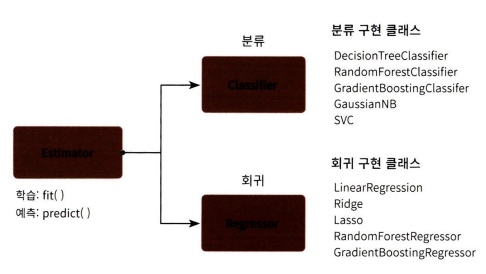

2) 비지도학습(차원 축소, 클러스터링, 피처 추출 등)

* `fit()`: 학습 X, 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업

* `transform()`: 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업

* `fit_transform()`: `fit()` + `transform()`

--- 

#### **3-2. 사이킷런의 주요 모듈** 

* 주요 프로세스: 피처 처리 -> ML 알고리즘 학습/예측 수행 -> 모델 평가

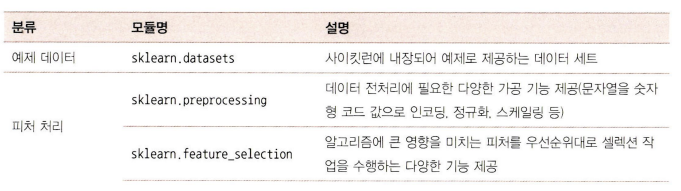

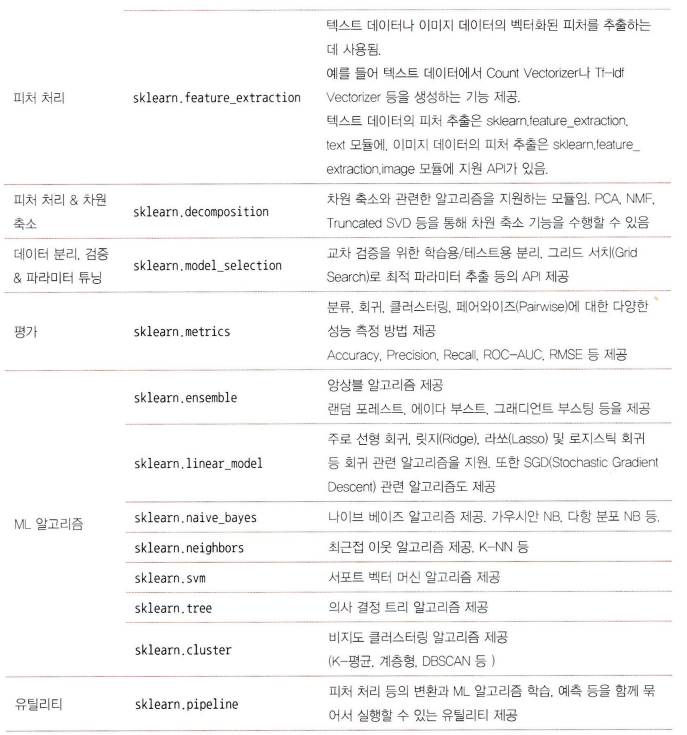

---

#### **3-3. 내장된 예제 데이터 세트** 

* 분류/회귀를 연습하기 위한 예제 데이터와 분류/클러스터링을 위해 표본 데이터로 생성될 수 있는 데이터 세트로 나뉨

* 사이킷런에 내장된 데이터 세트는 일반적으로 딕셔너리 형태로 되어 있음

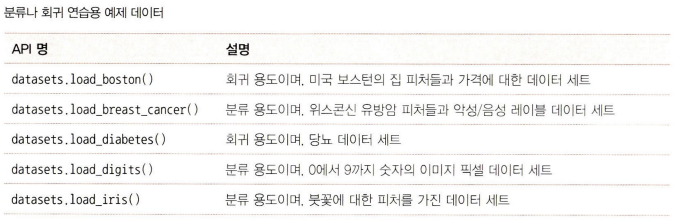

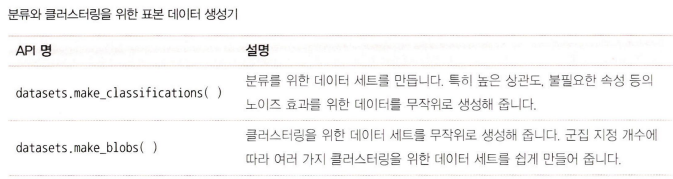

**<데이터 구성>**

* `data`: 피처의 데이터 세트 - 넘파이 배열

* `target`: 분류 시 레이블 값, 회귀일 때는 숫자 결과값 데이터 세트 - 넘파이 배열

* `target_names`: 개별 레이블의 이름 - 넘파이 배열 또는 리스트

* `feature_names`: 피처의 이름 - 넘파이 배열 또는 리스트

* `DESCR`: 데이터 세트에 대한 설명과 각 피처의 설명 - 스트링 타입

In [34]:
# 내장 데이터 세트 호출
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


>> 피처의 데이터 값을 반환받기 위해서는 내장 데이터 세트 API를 호출한 뒤에 그 Key 값을 지정하면 됨

>> Bunch 클래스: 파이썬 딕셔너리 자료형과 유사

In [35]:
# 데이터 세트의 key 값 확인
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


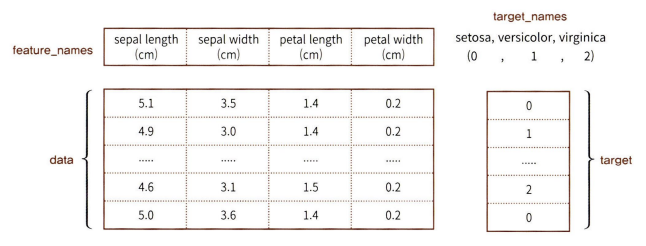

**<데이터 값 추출>**

* `df.키이름` or `df['키이름']`

In [36]:
print('\n feature_names의 type:', type(iris_data.feature_names))
print('feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print(' data의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type:', type(iris_data.target))
print(' target의 shape:', iris_data.target.shape)
print(iris_data.target)


 feature_names의 type: <class 'list'>
feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
 data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5

---

### **4. Model Selection 모듈 소개**

* `Model Selection` 모듈: 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스 제공

#### **4-1. 학습/테스트 데이터 세트 분리 - train_test_split()** 

* `train_test_split(피처데이터세트, 레이블데이터세트)`: 원본 데이터 세트에서 학습 및 테스트 데이터 세트를 쉽게 분리

* `test_size`: 전체 데이터에서 테스트 데이터 세트의 비율(디폴트는 0.25)

* `shuffle`: 데이터를 분리하기 전에 데이터를 미리 섞을지(디폴트는 True)

* `random_state`: 호출할 때마다 동일한 데이터 세트를 생성하기 위해 주어지는 난수 값

* 반환값: (train 피처, test 피처, train 레이블, test 레이블) 


In [37]:
# 학습과 예측을 동일한 데이터 세트로 수행
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label= iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


>> 예측을 수행하는 데이터 세트와 학습을 수행하는 데이터 세트가 동일하면 안 됨

In [38]:
# 붓꽃 데이터 세트를 테스트 데이터 세트 30%로 분리
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

df_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.3, random_state=121)

In [39]:
df_clf.fit(X_train, y_train)
pred = df_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


---

#### **4-2. 교차 검증** 

* 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우 예측 성능이 과도하게 떨어지는 '과적합'이 나타날 수 있음

* 또한 고정된 학습 데이터와 테스트로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생김

 -> 이러한 문제점을 개선하기 위해 교차 검증을 이용해 더 다양한 학습과 평가를 수행함

* 교차 검증: 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행

* 데이터 세트 세분화: '학습', '검증', '테스트' 데이터
 
 -> 테스트 데이터 세트 외에 별도의 검증 데이터 세트를 둬서 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용

 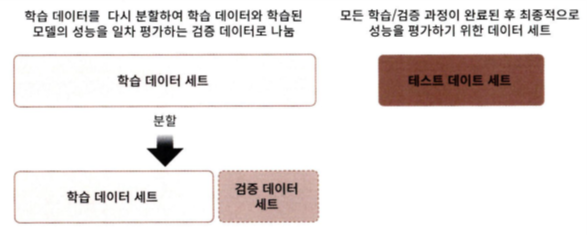

 --- 
#### **<K 폴드 교차 검증>**

* 방법: K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴드 세트에 학습과 검증 평과를 반복적으로 수행

* 절차

1) 먼저 데이터 세트를 5등분한다.

2) 5개의 데이터 세트를 학습과 검증을 위한 데이터 세트로 변경하면서 5번 평가를 수행한다.

3) 이 5개 평가의 평균을 계산한 후 이를 K 폴드 평가 결과로 반영한다.

* 클래스 종류: `KFold`, `StratifiedKFold`

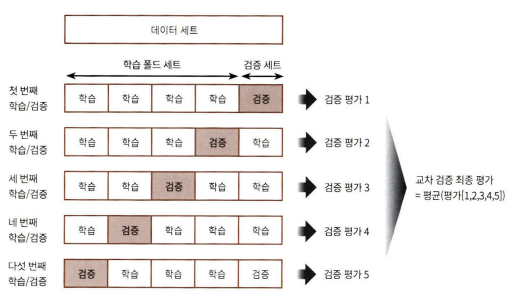



In [40]:
# KFold 클래스 이용
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

In [41]:
# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성 
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


In [42]:
n_iter=0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출,
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter+=1

    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format
          (n_iter, accuracy, train_size,test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차 검증 정확도: 1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도: 0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도: 0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도: 0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도: 0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도:  0.9


>> 평균 검증 정확도는 0.9이고 교차 검증 시마다 검증 세트의 인덱스가 달라짐

---
#### **<Stratified K 폴드>**

* 대상: 불균형한 분포도를 가진 레이블 데이터 집합(특정 레이블 값이 매우 많거니 적은 것)을 위한 K 폴드 방식

* 방법: 원본 데이터의 레이블 분포를 먼저 고려한 뒤, 이 분포와 동일하게 학습과 검증 데이터 세트를 분배함

* 주의: 사용 방법은 `KFold`와 비슷하지만 `split()` 메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요함!!

* 일반적으로 분류에서의 교차 검증은 K 폴드가 아니라 Stratified K 폴드로 분할돼야 함

* 회귀에서는 Stratified K 폴드가 지원되지 않음

In [43]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

>> 레이블 값 모두 50개로 동일

In [44]:
# 잘못된 예시
# 3개의 폴드 세트로 KFold를 생성한 후
# 각 학습/검증 레이블 데이터 값의 분포도 확인

kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('##교차검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print('\n')

##교차검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64


##교차검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64


##교차검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64




>> 예측 정확도는 0이 될 것임

In [45]:
# 옳은 방식
# 3개의 폴드 세트로 StratifiedKFold를 생성한 후
# 각 학습/검증 레이블 데이터 값의 분포도 확인

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('##교차검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())

##교차검증: 1
학습 레이블 데이터 분포: 
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
1    17
2    16
Name: label, dtype: int64
##교차검증: 2
학습 레이블 데이터 분포: 
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 0    17
2    17
1    16
Name: label, dtype: int64
##교차검증: 3
학습 레이블 데이터 분포: 
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포: 
 1    17
2    17
0    16
Name: label, dtype: int64


>>  학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당됨을 알 수 있음 

In [46]:
# StratifiedKFold을 이용한 붓꽃 데이터 교차 검증

dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

# StratifiedKFold의 split() 호출 시 반드시 레이블 데이터 세트도 추가 입력 필요
for train_index, test_index in skfold.split(features, label):
    
    # split()으로 반환된 인덱스를 이용해 학습용 검증용 테스트데이터 추출 
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측 
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시마다 정확도 측정 
    n_iter+=1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
    .format(n_iter, accuracy, train_size,test_size))
    print('#{0} 검증 세트 인덱스 : {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 교차 검증별 정확도를 합하여 평균 정확도 계산
print('\n## 교차 검증별 정확도: ', np.round(cv_accuracy,4))
print('\n## 평균 검증 정확도: ', np.mean(cv_accuracy))


#1 교차 검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 : 0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 : 0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도:  [0.98 0.94 0.98]

## 평균 검증 정확도:  0.9666666666666667


---
#### **4-3. 교차 검증을 보다 간편하게 - cross_val_score()**

* `cross_val_score()`: 폴드 세트 설정 + 학습 및 테스트 데이터 인덱스 추출 + 반복적으로 학습과 예측을 수행하고 예측 성능 반환

        cross_val_score(estimator, X, y=None, scoring=None, cv=None,  n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')

    * `estimator`: 분류 알고리즘 클래스(`Classifier`) or 회귀 알고리즘 클래스(`Regressor`)

    * `X`: 피처 데이터 세트, `y`: 레이블 데이터 세트

    * `scoring`: 예측 성능 평가 지표를 기술

    * `cv`: 교차 검증 폴드 수

* 반환값: `scoring` 파라미터로 지정된 성능 지표 측정값을 배열 형태로 반환

* 분할 방식:
    * classifier -> Stratified K 폴드 방식
    * regressor -> K 폴드 방식

* `cross_validate()`는 여러 개의 평가 지표를 반환할 수 있으며 성능 평가 지표와 수행 시간도 함께 제공

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=16)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.92 1.  ]
평균 검증 정확도: 0.9667


>> `cv`로 지정된 횟수만큼 `scoring` 파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환

>> `cross_val_score()`는 내부에서 학습, 예측, 평가를 모두 하므로 간단하게 교차 검증 수행 가능


---
#### **4-4. GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에**

* 하이퍼 파라미터: 머신러닝 알고리즘의 주요 구성 요소이며 이 값을 조정해 알고리즘의 예측 성능을 개선할 수 있음

* `GridSearchCV`란:
    
    * Classifier나 Regressor과 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공
    * 데이터 세트를 cross-validation을 위한 학습/테스트 세트로 자동으로 분할한 뒤, 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해줌
    * 총 학습/평가 횟수 = CV 수 X 파라미터 조합 수

* 주요 파라미터
    * `esimator`: classifier, regressor, pipeline 가능
    * `param_grid`: 

In [48]:
# 결정 트리 알고리즘의 여러 하이퍼 파라미터를 변경하면서 최고 조합 찾기
grid_parameters = {'max_depth': [1, 2, 3], 
                   'min_sample_split': [2, 3]
                   }

>> 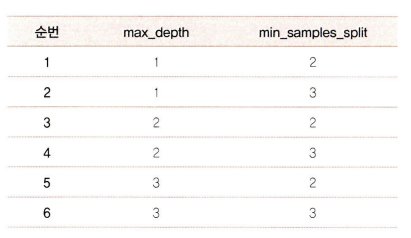

>> 하이퍼 파라미터는 다음과 같이 순차적으로 적용됨

In [49]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습 데이터와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test= train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

### 파라미터를 딕셔너리 형태로 설정
parameters= {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

In [50]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold 로 나눠 테스트 수행 설정.
### refit=True가 default. True이면 가장 좋은 파라미터 설정으로 재학습

grid_dtree = GridSearchCV(dtree, param_grid=parameters,cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터 순차적 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score','split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [51]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [52]:
# GridSerachCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSerachCV의 best_estimator는 이미 최적 학습이 됐으므로 별도 학습 필요없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도:0.9667
